# Ensemble Learning Methods Introduction

Supervised Learning

Group of predictions (classifier/regressors)

BOOTSTRAP SAMPLING: Sampling with replacement

 PASTING: Sampling without replacement

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.shape

(891, 15)

In [12]:
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [6]:
df.dropna(inplace=True)

In [14]:
df['pclass']

1      1
3      1
6      1
10     3
11     1
      ..
871    1
872    1
879    1
887    1
889    1
Name: pclass, Length: 182, dtype: int64

In [10]:
df['pclass'].unique()

array([1, 3, 2], dtype=int64)

In [11]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [15]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [16]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

<AxesSubplot:>

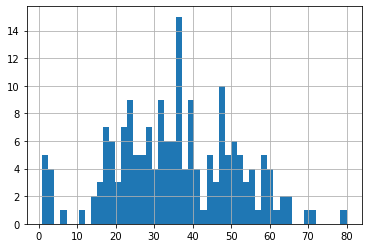

In [19]:
df['age'].hist(bins=50)

# Data Pre-processing

In [20]:
X = df[['pclass','sex','age']]

In [21]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [22]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\HP\AppData\Local\Temp/ipykernel_21324/3256440739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = lb.fit_transform(X['sex'])


In [23]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [24]:
X.shape

(182, 3)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int32  
 2   age     182 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 5.0 KB


In [26]:
y = df['survived']

In [27]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64